In [44]:
# pip install pandas

In [45]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\bhanu\OneDrive\Desktop\courses\STT_report1\Lab2\pipenv.csv"
df = pd.read_csv(file_path)

In [46]:
# Extract the 15 rows with unique bug fixes
rows_to_select = [0, 1, 2, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27]

# Select the specific rows
df_selected_rows = df.iloc[rows_to_select]
df_selected_rows_reset = df_selected_rows.reset_index(drop=True)

In [47]:
# Save to a new CSV file
new_file_path = r"C:\Users\bhanu\OneDrive\Desktop\courses\STT_report1\Lab2\pipenv_first_15.csv"
df_selected_rows_reset.to_csv(new_file_path, index=False)

print(f"Bug fiz analysis csv: {new_file_path}")

Bug fiz analysis csv: C:\Users\bhanu\OneDrive\Desktop\courses\STT_report1\Lab2\pipenv_first_15.csv


In [48]:
# Load the CSV file
file_path = r"C:\Users\bhanu\OneDrive\Desktop\courses\STT_report1\Lab2\pipenv_first_15.csv"
final_df = pd.read_csv(file_path)

In [49]:
label = pd.Series(['DEV', 'DEV', 'DEV', 'BOTH', 'TOOL', 'NONE', 'TOOL', 'DEV', 'DEV', 'BOTH', 'DEV', 'DEV', 'DEV', 'DEV', 'TOOL'])

reason = pd.Series([
    'Tool says it is a typo, but it actually prevents keyerror if package group does not exist in pipfile.',
    'The dev commit is more accurate, indicating that the change was made for Python 3 compatibility',
    'Tool message says that a change has been made to project.py, it is not very informative. It does not tell the reader what was fixed or changed',
    'Dev message is informing that the change is related to making the code compatible with OrderedDict while Tool message is somewhat descriptive, indicating that the code now uses requests.compat for OrderedDict if available',
    'Tool clearly explains the fix, while Dev message is not relevant',
    'Tool is lacking content about which type it fixed. Dev message is very unclear.',
    'Tool message specifies what the change is related to, and helps to understand the modification without looking into the code. Dev message is not useful at all.',
    'Dev message provides more context and clarifies the intent of the change. Tool message lacks clarity.',
    'Dev message is clear and concise, Tool message is too vague',
    'Dev provides context for the change and Tool describes what is changed.',
    'Dev message explains the change and why it is made. Tool only specifies what change is made.',
    'Dev message precisely focuses on the problem and tells why the change is made. Tool message tells more about what change.',
    'This commit has 2 changes. Dev tells about both the changes while Tool only mentions. Making 2 fixes in a commit is a bad practice, but if it is made, at least the commit should describe the fix instead of ignoring one change.',
    'Dev message is very clear, descriptive and provides context. Tool message is as descriptive.',
    'Tool clearly explains the fix, Dev is very vague'
])

In [58]:

# If the lengths are the same, assign the series as new columns
final_df.loc[:, 'label'] = label.values
final_df.loc[:, 'reason'] = reason.values


# Check the updated DataFrame
final_df.head()


,Before Bug fix,After Bug fix,Location,Bug type,Commit Message,Project URL,File Path,Fixed Commit,Buggy Commit,Test File,Coding Effort,Constructs,Lizard Features Buggy,Lizard Features Fixed,BLEU,crystalBLEU_score,BERT_score,label,reason
0,49 f.write(toml.dumps(data))\n50 \...,49 f.write(toml.dumps(data))\n50 \...,"Before: 60, 61\nAfter: 60, 61, 62",fix typo in project.py,don't error out if group doesn't exist,https://github.com/pypa/pipenv,pipenv/project.py,e06727075a4a45d1be99db13513bc0b14643667c,d862ed6093dfd47f2800a9c9f5b6d7d2c48ab82c,0,539,"{'module': 1, 'expression_statement': 6, 'call...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...",0.828820,0.830231,"(tensor([0.9858]), tensor([0.9888]), tensor([0...",DEV,"Tool says it is a typo, but it actually preven..."
1,67 f.write(data)\n68 \n69 @sta...,67 f.write(data)\n68 \n69 @sta...,Before: 84\nAfter: 84,fix typo in project.py,python3 fixes,https://github.com/pypa/pipenv,pipenv/project.py,3d023a63d8d5b7c3e104f27b93dc65eaf33f1157,a5da8d984df96974a94158edc8e33ff15bb07829,0,750,"{'module': 1, 'expression_statement': 9, 'call...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...",0.947030,0.946241,"(tensor([0.9886]), tensor([0.9974]), tensor([0...",DEV,"The dev commit is more accurate, indicating th..."
2,48 def lockfile_exists(self):\n49 ...,48 def lockfile_exists(self):\n49 ...,Before: 52\nAfter: 52,fix project.py -- a/pipenv/project.py -- b/pip...,fix default source,https://github.com/pypa/pipenv,pipenv/project.py,33240ac6581188e363d2e4e21753a3071f57df86,cb22a129eae8c8e800e603c38bf1fe04d420fbde,0,446,"{'module': 1, 'function_definition': 2, 'def':...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...",0.969028,0.964942,"(tensor([0.9871]), tensor([0.9949]), tensor([0...",DEV,Tool message says that a change has been made ...
3,1 import os\n2 try:\n3 from collections im...,1 import os\n2 \n3 import toml\n4 \n5 from req...,"Before: 2, 3, 4, 5\nAfter: 5, 6",use requests.compat if available,fixing OrderedDict,https://github.com/pypa/pipenv,pipenv/project.py,410444c815ef130eeaec156667fb17f53a60e41f,1889055917e4cbfabeda56215a1f3b0f8e80f8f6,0,9,"{'module': 1, 'import_statement': 1, 'import':...","{'cyclomatic_complexity': 6, 'nloc': 11, 'toke...","{'cyclomatic_complexity': 6, 'nloc': 11, 'toke...",0.116816,0.082044,"(tensor([0.7589]), tensor([0.8681]), tensor([0...",BOTH,Dev message is informing that the change is re...
4,1 __version__ = '3.2.5'\n,1 __version__ = '3.2.TEST'\n,Before: 1\nAfter: 1,update pipenv to 3.2.test,"Revert ""Merge branch 'master' into fix_link_pa...",https://github.com/pypa/pipenv,pipenv/__version__.py,94eb22a8ce1c16bceb705ffe3156a565e306fab8,848ea144a6b520a7cd8e767466546474a31b7621,0,10,{'module': 1},{},{},0.537285,0.000000,"(tensor([0.8772]), tensor([0.9301]), tensor([0...",TOOL,"Tool clearly explains the fix, while Dev messa..."


In [51]:
# Save to a new CSV file
new_file_path = r"C:\Users\bhanu\OneDrive\Desktop\courses\STT_report1\Lab2\pipenv_final.csv"
final_df.to_csv(new_file_path, index=False)

print(f"Bug fiz analysis csv: {new_file_path}")

Bug fiz analysis csv: C:\Users\bhanu\OneDrive\Desktop\courses\STT_report1\Lab2\pipenv_final.csv


Interpreting Coding Effort

In [52]:
import ast
buggy_col = "Lizard Features Buggy"

In [53]:
# Function to extract filename safely
def extract_filename(dict_str):
    try:
        data = ast.literal_eval(dict_str)  # Convert string to dictionary
        return data.get("filename", None)  # Get filename if exists
    except (ValueError, SyntaxError):
        return None  

In [67]:
# Extract filenames from both buggy and fixed columns
file_df = df
file_df["Buggy_File"] = file_df[buggy_col].apply(extract_filename)

# Strip off the common folder path from each file using lambda
folder_to_remove = "/home/set-iitgn-vm/.local/lib/python3.10/site-packages/Minecpp/pipenv/"
file_df['Buggy_File'] = file_df['Buggy_File'].apply(lambda x: x[len(folder_to_remove):] if isinstance(x, str) and x.startswith(folder_to_remove) else x)

file_df.head()

,Before Bug fix,After Bug fix,Location,Bug type,Commit Message,Project URL,File Path,Fixed Commit,Buggy Commit,Test File,Coding Effort,Constructs,Lizard Features Buggy,Lizard Features Fixed,BLEU,crystalBLEU_score,BERT_score,Buggy_File
0,49 f.write(toml.dumps(data))\n50 \...,49 f.write(toml.dumps(data))\n50 \...,"Before: 60, 61\nAfter: 60, 61, 62",fix typo in project.py,don't error out if group doesn't exist,https://github.com/pypa/pipenv,pipenv/project.py,e06727075a4a45d1be99db13513bc0b14643667c,d862ed6093dfd47f2800a9c9f5b6d7d2c48ab82c,0,539,"{'module': 1, 'expression_statement': 6, 'call...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...",0.828820,0.830231,"(tensor([0.9858]), tensor([0.9888]), tensor([0...",prev/pipenv/project.py
1,67 f.write(data)\n68 \n69 @sta...,67 f.write(data)\n68 \n69 @sta...,Before: 84\nAfter: 84,fix typo in project.py,python3 fixes,https://github.com/pypa/pipenv,pipenv/project.py,3d023a63d8d5b7c3e104f27b93dc65eaf33f1157,a5da8d984df96974a94158edc8e33ff15bb07829,0,750,"{'module': 1, 'expression_statement': 9, 'call...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...",0.947030,0.946241,"(tensor([0.9886]), tensor([0.9974]), tensor([0...",prev/pipenv/project.py
2,48 def lockfile_exists(self):\n49 ...,48 def lockfile_exists(self):\n49 ...,Before: 52\nAfter: 52,fix project.py -- a/pipenv/project.py -- b/pip...,fix default source,https://github.com/pypa/pipenv,pipenv/project.py,33240ac6581188e363d2e4e21753a3071f57df86,cb22a129eae8c8e800e603c38bf1fe04d420fbde,0,446,"{'module': 1, 'function_definition': 2, 'def':...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...",0.969028,0.964942,"(tensor([0.9871]), tensor([0.9949]), tensor([0...",prev/pipenv/project.py
3,54 f.write(toml.dumps(data))\n55 \...,54 f.write(toml.dumps(data))\n55 \...,Before: 61\nAfter: 61,fix project.py -- a/pipenv/project.py -- b/pip...,fix default source,https://github.com/pypa/pipenv,pipenv/project.py,33240ac6581188e363d2e4e21753a3071f57df86,cb22a129eae8c8e800e603c38bf1fe04d420fbde,0,566,"{'module': 1, 'expression_statement': 1, 'call...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...",0.822187,0.804794,"(tensor([0.9463]), tensor([0.9801]), tensor([0...",prev/pipenv/project.py
4,58 if 'source' in self.parsed_pipfile:...,60 else:\n61 return [{u'ur...,"Before: 63, 64\nAfter: 63",fix project.py -- a/pipenv/project.py -- b/pip...,fix default source,https://github.com/pypa/pipenv,pipenv/project.py,33240ac6581188e363d2e4e21753a3071f57df86,cb22a129eae8c8e800e603c38bf1fe04d420fbde,0,570,"{'module': 1, 'if_statement': 1, 'if': 1, 'com...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...","{'cyclomatic_complexity': 1, 'nloc': 2, 'token...",0.299920,0.293349,"(tensor([0.8179]), tensor([0.9058]), tensor([0...",prev/pipenv/project.py


In [85]:
codeing_effort_file = file_df[['Coding Effort', 'Buggy_File']].copy()

# Group by 'Buggy_File' and sum the 'Coding Effort' for each group
aggregated_df = df.groupby('Buggy_File', as_index=False)['Coding Effort'].sum()
aggregated_df = aggregated_df.sort_values(by='Coding Effort', ascending=False).reset_index(drop=True)
aggregated_df.head()


,Buggy_File,Coding Effort
0,prev/pipenv/project.py,2272885
1,prev/pipenv/vendor/ruamel/yaml/scanner.py,1475779
2,prev/pipenv/utils/resolver.py,1464704
3,prev/pipenv/environment.py,1048457
4,prev/pipenv/vendor/tomlkit/items.py,1022717


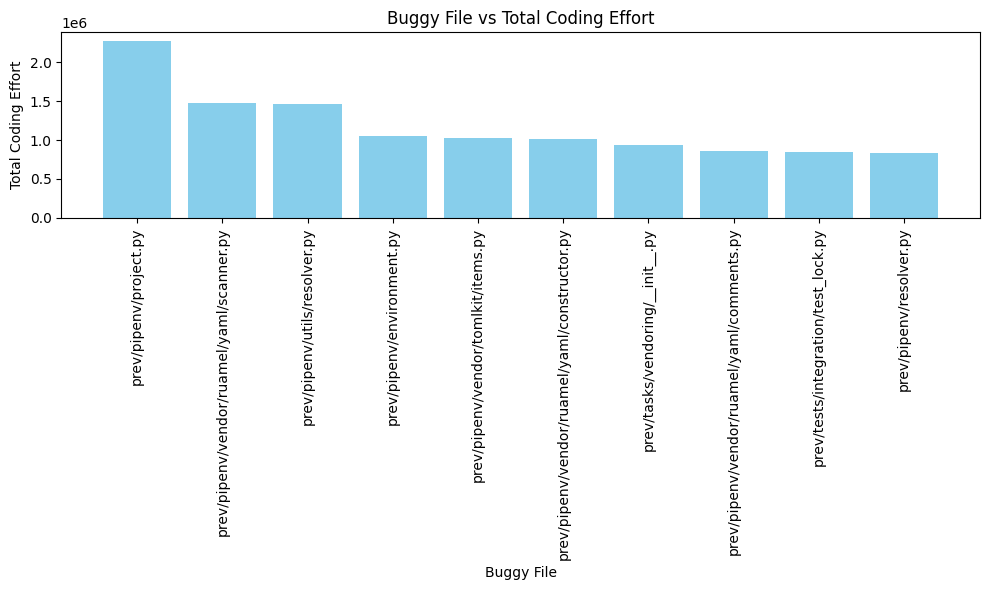

In [86]:
import matplotlib.pyplot as plt
aggregated_df_10 = aggregated_df.iloc[:10]

plt.figure(figsize=(10, 6))
plt.bar(aggregated_df_10['Buggy_File'], aggregated_df_10['Coding Effort'], color='skyblue')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Buggy File')
plt.ylabel('Total Coding Effort')
plt.title('Total Coding Effort vs Buggy File')

# Display the plot
plt.tight_layout()
plt.show()


In [82]:
codeing_effort_file = file_df[['Coding Effort', 'Buggy_File']].copy()

# Group by 'Buggy_File' and sum the 'Coding Effort' for each group
aggregated_df = df.groupby('Buggy_File', as_index=False)['Coding Effort'].mean()
aggregated_df = aggregated_df.sort_values(by='Coding Effort', ascending=False).reset_index(drop=True)
aggregated_df.head()

,Buggy_File,Coding Effort
0,prev/pipenv/patched/pip/_vendor/rich/console.py,11372.545455
1,prev/pipenv/patched/pip/_vendor/pkg_resources/...,10632.555556
2,prev/pipenv/vendor/ruamel/yaml/scanner.py,8290.893258
3,prev/pipenv/vendor/click/core.py,8067.489130
4,prev/pipenv/vendor/ruamel/yaml/constructor.py,6612.320261


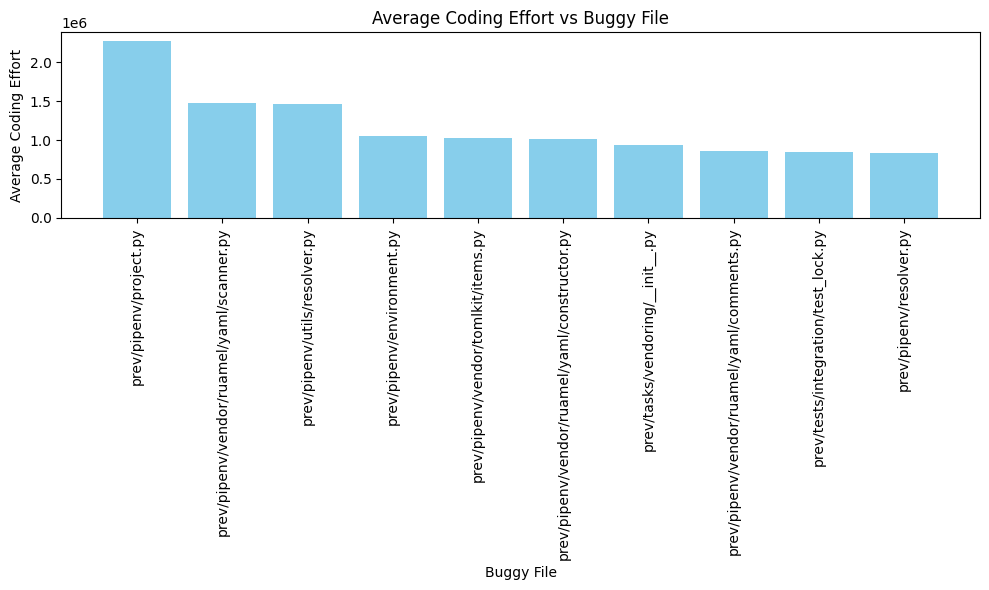

In [87]:
import matplotlib.pyplot as plt
aggregated_df_10 = aggregated_df.iloc[:10]

plt.figure(figsize=(10, 6))
plt.bar(aggregated_df_10['Buggy_File'], aggregated_df_10['Coding Effort'], color='skyblue')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Adding labels and title
plt.xlabel('Buggy File')
plt.ylabel('Average Coding Effort')
plt.title('Average Coding Effort vs Buggy File')

# Display the plot
plt.tight_layout()
plt.show()


Identify Patterns and Trends:

In [97]:
sorted_df = df.sort_values(by='Coding Effort', ascending=False)
max_coding_effort_row = sorted_df.iloc[0]
second_max_coding_effort_row = sorted_df.iloc[1]

# Print the maximum and second maximum values
# print("Max Coding Effort Row:")
# print(max_coding_effort_row)

# print("\nSecond Max Coding Effort Row:")
# print(second_max_coding_effort_row)

# If you want to print specific columns, for example, 'Buggy_File' for both:
print("\nMax Coding Effort Buggy File:", max_coding_effort_row['Buggy_File'])
print("Second Max Coding Effort Buggy File:", second_max_coding_effort_row['Buggy_File'])



Max Coding Effort Buggy File: prev/pipenv/patched/pip/_vendor/pkg_resources/__init__.py
Second Max Coding Effort Buggy File: prev/pipenv/patched/pip/_vendor/pkg_resources/__init__.py
